In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('/Datasets/Superstore sale - Only Order.csv',encoding='unicode_escape',na_values="NA")
df.head(5)

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date,Return_status,Managers
0,1,3,13-10-2010,Low,6,261.5400,0.04,Regular Air,96.769800,38.94,...,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,20-10-2010,Not Returned,Chris
1,49,293,01-10-2012,High,49,10123.0200,0.07,Delivery Truck,3340.596600,208.16,...,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,02-10-2012,Not Returned,Chris
2,50,293,01-10-2012,High,27,244.5700,0.01,Regular Air,80.708100,8.69,...,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,03-10-2012,Not Returned,Chris
3,80,483,10-07-2011,High,30,4965.7595,0.08,Regular Air,1142.124685,195.99,...,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,12-07-2011,Not Returned,Chris
4,85,515,28-08-2010,Not Specified,19,394.2700,0.08,Regular Air,86.739400,21.78,...,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,30-08-2010,Not Returned,Chris


In [3]:
df.shape

(5269, 23)

In [5]:
df.isnull().sum()
#data=data.dropna() #If any null value exist

Row ID                  0
Order ID                0
Order Date              0
Order Priority          0
Order Quantity          0
Sales                   0
Discount                0
Ship Mode               0
Profit                  0
Unit Price              0
Shipping Cost           0
Customer Name           0
Province                0
Region                  0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Name            0
Product Container       0
Product Base Margin     0
Ship Date               0
Return_status           0
Managers                0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5269 entries, 0 to 5268
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row ID                5269 non-null   int64  
 1   Order ID              5269 non-null   int64  
 2   Order Date            5269 non-null   object 
 3   Order Priority        5269 non-null   object 
 4   Order Quantity        5269 non-null   int64  
 5   Sales                 5269 non-null   float64
 6   Discount              5269 non-null   float64
 7   Ship Mode             5269 non-null   object 
 8   Profit                5269 non-null   float64
 9   Unit Price            5269 non-null   float64
 10  Shipping Cost         5269 non-null   float64
 11  Customer Name         5269 non-null   object 
 12  Province              5269 non-null   object 
 13  Region                5269 non-null   object 
 14  Customer Segment      5269 non-null   object 
 15  Product Category     

In [6]:
df.describe()

,Row ID,Order ID,Order Quantity,Sales,Discount,Profit,Unit Price,Shipping Cost,Product Base Margin
count,5269.000000,5269.000000,5269.000000,5269.000000,5269.000000,5269.000000,5269.000000,5269.000000,5269.000000
mean,4144.207440,29565.016701,25.497248,1772.101637,0.049732,533.340124,83.269687,15.874944,0.510442
std,2390.500151,17013.986755,14.436434,3608.598833,0.031812,1139.865003,229.933565,120.991103,0.142597
min,1.000000,3.000000,1.000000,2.240000,0.000000,0.716800,1.140000,0.490000,0.000000
25%,2080.000000,14855.000000,13.000000,144.550000,0.020000,42.728400,6.480000,3.370000,0.380000
50%,4146.000000,29410.000000,26.000000,450.280000,0.050000,130.688000,20.990000,6.160000,0.520000
75%,6216.000000,44007.000000,38.000000,1718.430000,0.080000,507.988800,90.480000,13.990000,0.590000
max,8394.000000,59969.000000,50.000000,89061.050000,0.250000,34733.809500,6783.020000,6900.000000,0.850000


In [7]:
df.rename(columns={'Row ID':'row_id',
                   'Order ID':'order_id',
                   'Order Date':'order_date',
                   'Sales':'sales',
                   'Discount':'discount',
                   'Ship Mode':'ship_mode',
                   'Profit':'profit',
                   'Unit Price':'unit_price',
                   'Shipping Cost':'shipping_cost',
                   'Customer Name':'customer_name',
                   'Province':'province',
                   'Region':'region',
                   'Customer Segment':'segment',
                   'Product Category':'category',
                   'Product Sub-Category':'sub_category',
                   'Product Name':'name',
                   'Product Container':'container',
                   'Product Base Margin':'margin',
                   'Ship Date':'shipping_date',
                   'Return_status':'status',
                   'Managers':'managers',
                   'Order Priority':'priority',
                   'Order Quantity':'quantity'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5269 entries, 0 to 5268
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row_id         5269 non-null   int64  
 1   order_id       5269 non-null   int64  
 2   order_date     5269 non-null   object 
 3   priority       5269 non-null   object 
 4   quantity       5269 non-null   int64  
 5   sales          5269 non-null   float64
 6   discount       5269 non-null   float64
 7   ship_mode      5269 non-null   object 
 8   profit         5269 non-null   float64
 9   unit_price     5269 non-null   float64
 10  shipping_cost  5269 non-null   float64
 11  customer_name  5269 non-null   object 
 12  province       5269 non-null   object 
 13  region         5269 non-null   object 
 14  segment        5269 non-null   object 
 15  category       5269 non-null   object 
 16  sub_category   5269 non-null   object 
 17  name           5269 non-null   object 
 18  containe

In [8]:
selected_columns = ['sales', 'category', 'sub_category', 'quantity', 'priority']

# Create the new DataFrame with only the selected columns
new_table = df[selected_columns]

# Print the new table (optional)
new_table.head(5)


,sales,category,sub_category,quantity,priority
0,261.5400,Office Supplies,Storage & Organization,6,Low
1,10123.0200,Office Supplies,Appliances,49,High
2,244.5700,Office Supplies,Binders and Binder Accessories,27,High
3,4965.7595,Technology,Telephones and Communication,30,High
4,394.2700,Office Supplies,Appliances,19,Not Specified


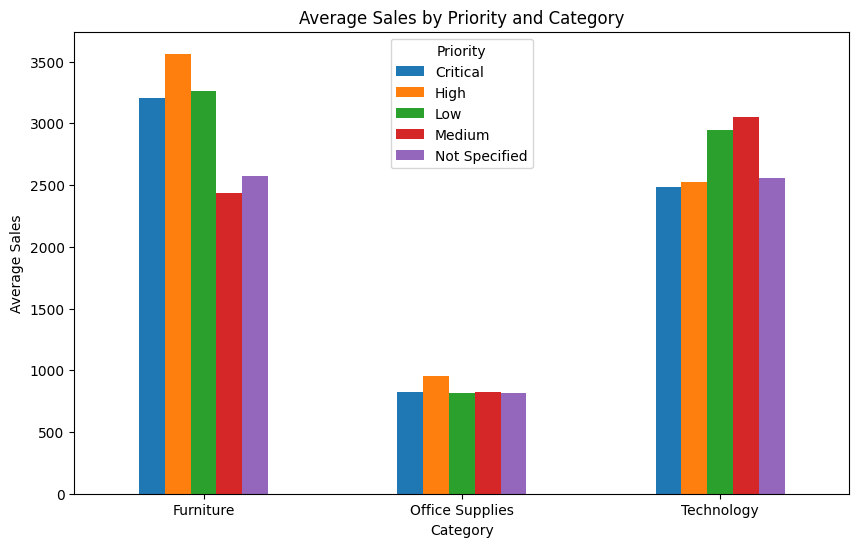

In [13]:
# @title Average Sales by Priority and Category

avg_sales = df.groupby(['category', 'priority'])['sales'].mean().unstack()

# Create a bar chart
avg_sales.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Category')
plt.ylabel('Average Sales')
plt.title('Average Sales by Priority and Category')
plt.xticks(rotation=0)
_ = plt.legend(title='Priority')


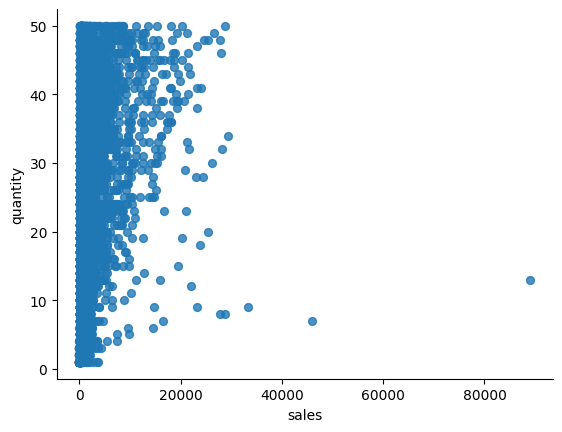

In [84]:
# @title sales vs quantity

new_table.plot(kind='scatter', x='sales', y='quantity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

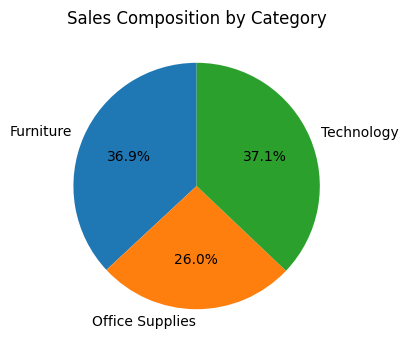

In [12]:
# @title Sales Composition by Category

# Group data by category and calculate total sales
sales_by_category = df.groupby('category')['sales'].sum()

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(sales_by_category, labels=sales_by_category.index, autopct='%1.1f%%', startangle=90)
_ = plt.title('Sales Composition by Category')

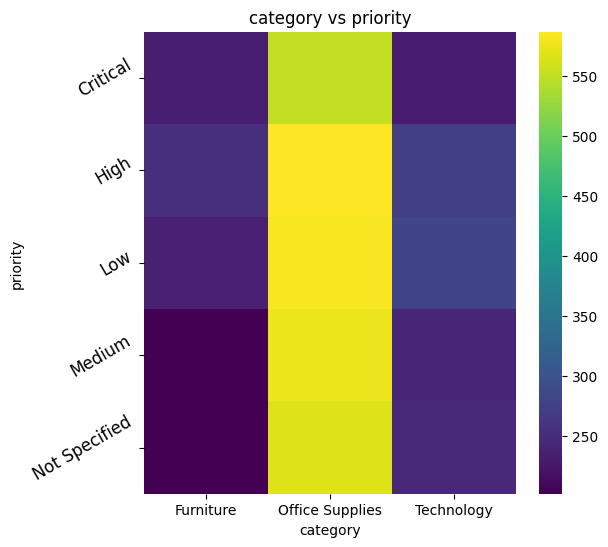

In [67]:
# @title category vs priority

plt.subplots(figsize=(6, 6))
df_2dhist = pd.DataFrame({
    x_label: grp['priority'].value_counts()
    for x_label, grp in new_table.groupby('category')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('category')
plt.ylabel('priority')
plt.title('category vs priority')
_=plt.yticks(rotation=30, ha='right', fontsize=12)


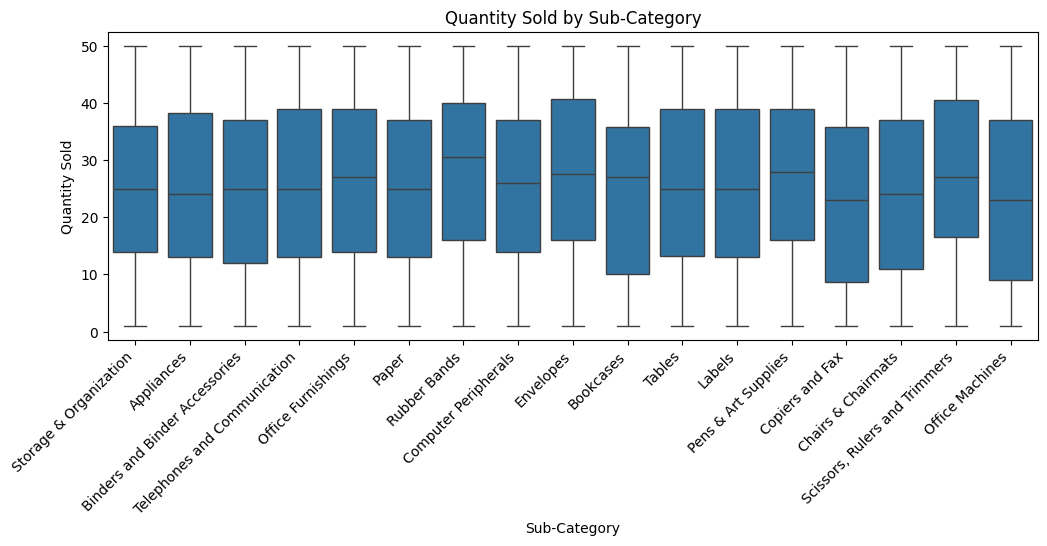

In [78]:
# @title Quantity Sold by Sub-Category

# Create a box plot
plt.figure(figsize=(12, 4))
sns.boxplot(x='sub_category', y='quantity', data=df)
plt.xlabel('Sub-Category')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45, ha='right') #To rotate all the lables
_ = plt.title('Quantity Sold by Sub-Category')

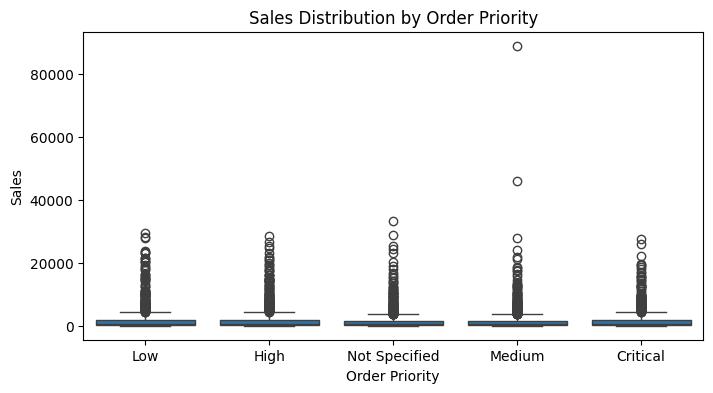

In [47]:
# @title Sales Distribution by Order Priority

# Create box plot
plt.figure(figsize=(8, 4))
sns.boxplot(x='priority', y='sales', data=df)
plt.xlabel('Order Priority')
plt.ylabel('Sales')
_ = plt.title('Sales Distribution by Order Priority')

<Axes: title={'center': 'Priority'}, ylabel='priority'>

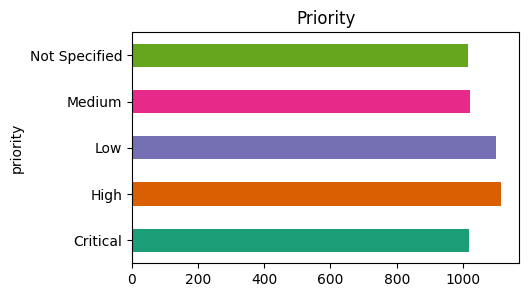

In [23]:
# @title Analyzing priority


new_table.groupby('priority').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'), figsize=(5, 3), title='Priority')
#plt.gca().spines[['top', 'right',]].set_visible(False)

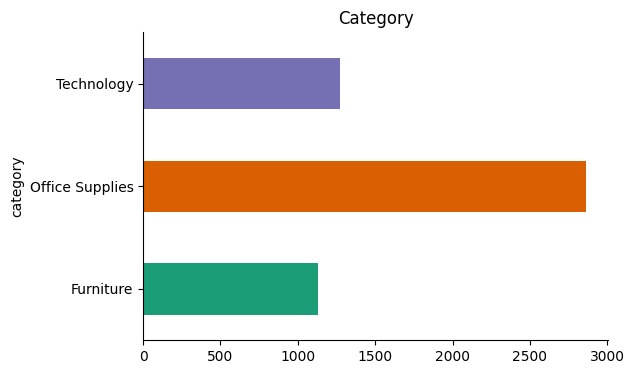

In [81]:
# @title Analyzing category

new_table.groupby('category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'), figsize=(6, 4), title='Category')

plt.gca().spines[['top', 'right',]].set_visible(False)

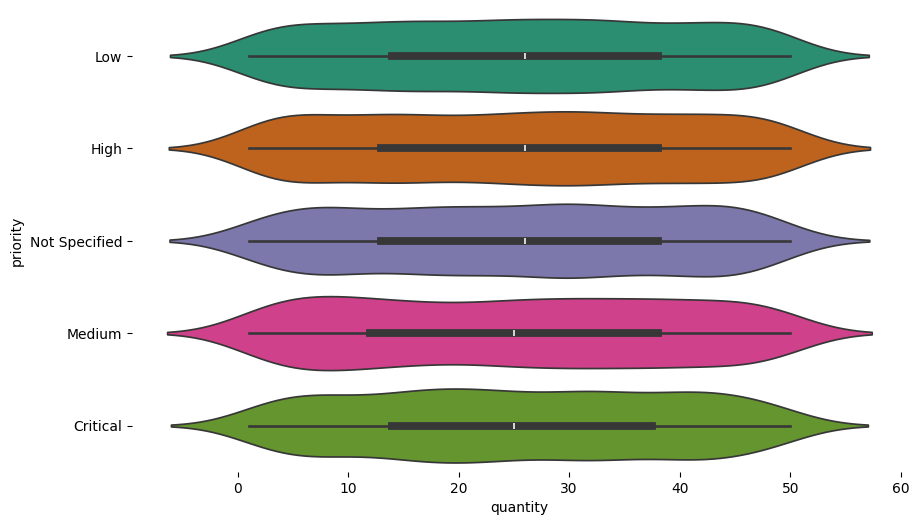

In [83]:
# @title priority vs quantity

figsize = (10, 1.2 * len(new_table['priority'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(new_table, x='quantity', y='priority', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [15]:
category_to_sum = 'Appliances'
filtered_df = df[df['sub_category'] == category_to_sum]
total_sales = filtered_df['sales'].sum()

print("Total sales for", category_to_sum, "sub_category:", total_sales)


Total sales for Appliances sub_category: 518392.81
